In [113]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [114]:
np.random.seed(42)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 20.0, 15)
X = x.reshape(15, 1)

In [116]:
df=pd.DataFrame({'x': x , 'y':y})

In [117]:
df

,x,y
0,0.000000,9.934283
1,1.428571,4.377571
2,2.857143,27.239485
3,4.285714,51.889169
4,5.714286,23.888361
5,7.142857,31.031547
6,8.571429,74.441399
7,10.000000,65.348695
8,11.428571,47.753369
9,12.857143,75.136915


In [146]:
polynomial_transformer = PolynomialFeatures(degree = 13, include_bias = False)

In [147]:
polynomial_features = polynomial_transformer.fit_transform(X)
polynomial_features = pd.DataFrame(polynomial_features, columns=polynomial_transformer.get_feature_names())

In [148]:
m_poly= LinearRegression()
m_poly.fit(polynomial_features, y)
ypred=m_poly.predict(polynomial_features)


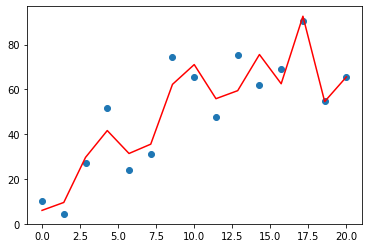

In [149]:
plt.scatter(X,y)
plt.plot(X, ypred, color='r')

In [24]:
 # Define the number of degrees that should be included
degrees = [1, 4, 15]

# Write a for loop that fit_transforms the model for all the different number of degrees
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Make a pipeline
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)
    
    # Actually plot the function
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

NameError: name 'y_train' is not defined